<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/training/camera_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import os
import pyarrow.parquet as pq

import tensorflow as tf

folder_path = '/content/drive/MyDrive/training/'

for filename in os.listdir(folder_path):
    if filename.endswith('.tfrecord'):
        file_path = os.path.join(folder_path, filename)
        expected_size = os.path.getsize(file_path)
        print(f"File: {filename} | Expected size: {expected_size} bytes")

        # Get the actual size of the file
        actual_size = 0
        for record in tf.data.TFRecordDataset(file_path):
            actual_size += int(record.numpy().size)
        
        print(f"Actual size: {actual_size} bytes\n")

In [4]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/training/camera_calibration/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

              key.segment_context_name  key.camera_name  \
0  15832924468527961_1564_160_1584_160                1   
1  15832924468527961_1564_160_1584_160                2   
2  15832924468527961_1564_160_1584_160                3   
3  15832924468527961_1564_160_1584_160                4   
4  15832924468527961_1564_160_1584_160                5   

   [CameraCalibrationComponent].intrinsic.f_u  \
0                                 2084.215657   
1                                 2075.391189   
2                                 2082.850280   
3                                 2080.064055   
4                                 2073.930686   

   [CameraCalibrationComponent].intrinsic.f_v  \
0                                 2084.215657   
1                                 2075.391189   
2                                 2082.850280   
3                                 2080.064055   
4                                 2073.930686   

   [CameraCalibrationComponent].intrinsic.c_u  \
0     

In [5]:
print(df.columns)

Index(['key.segment_context_name', 'key.camera_name',
       '[CameraCalibrationComponent].intrinsic.f_u',
       '[CameraCalibrationComponent].intrinsic.f_v',
       '[CameraCalibrationComponent].intrinsic.c_u',
       '[CameraCalibrationComponent].intrinsic.c_v',
       '[CameraCalibrationComponent].intrinsic.k1',
       '[CameraCalibrationComponent].intrinsic.k2',
       '[CameraCalibrationComponent].intrinsic.p1',
       '[CameraCalibrationComponent].intrinsic.p2',
       '[CameraCalibrationComponent].intrinsic.k3',
       '[CameraCalibrationComponent].extrinsic.transform',
       '[CameraCalibrationComponent].width',
       '[CameraCalibrationComponent].height',
       '[CameraCalibrationComponent].rolling_shutter_direction'],
      dtype='object')


In [6]:
df['key.camera_name']

0    1
1    2
2    3
3    4
4    5
Name: key.camera_name, dtype: int8

In [ ]:
import pyarrow.parquet as pq
import pandas as pd
from PIL import Image, ImageDraw

# Read in the camera calibration data from the .parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Extract the width and height of the camera
width = df['[CameraCalibrationComponent].width'].values[0]
height = df['[CameraCalibrationComponent].height'].values[0]

# Create a blank image to draw the rectangle on
img = Image.new('RGB', (width, height), color='black')

# Create a drawing object
draw = ImageDraw.Draw(img)

# Draw a rectangle on the image
draw.rectangle([(100, 100), (200, 200)], outline='red', width=2)

# Display the image with the rectangle drawn on it
img.show()

In [8]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Extract the calibration data for a specific camera
camera_name = 1
calibration_data = df.loc[df['key.camera_name'] == camera_name, [
    '[CameraCalibrationComponent].intrinsic.f_u',
    '[CameraCalibrationComponent].intrinsic.f_v',
    '[CameraCalibrationComponent].intrinsic.c_u',
    '[CameraCalibrationComponent].intrinsic.c_v',
    '[CameraCalibrationComponent].intrinsic.k1',
    '[CameraCalibrationComponent].intrinsic.k2',
    '[CameraCalibrationComponent].intrinsic.p1',
    '[CameraCalibrationComponent].intrinsic.p2',
    '[CameraCalibrationComponent].intrinsic.k3',
    '[CameraCalibrationComponent].width',
    '[CameraCalibrationComponent].height'
]].iloc[0]

# Extract the relevant calibration parameters
f_u = calibration_data['[CameraCalibrationComponent].intrinsic.f_u']
f_v = calibration_data['[CameraCalibrationComponent].intrinsic.f_v']
c_u = calibration_data['[CameraCalibrationComponent].intrinsic.c_u']
c_v = calibration_data['[CameraCalibrationComponent].intrinsic.c_v']
width = calibration_data['[CameraCalibrationComponent].width']
height = calibration_data['[CameraCalibrationComponent].height']

# Create an empty image to draw on
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Draw a cross at the principal point
draw.line([(c_u - 10, c_v), (c_u + 10, c_v)], fill=(255, 0, 0), width=2)
draw.line([(c_u, c_v - 10), (c_u, c_v + 10)], fill=(255, 0, 0), width=2)

# Display the image with the rectangle drawn on it
img.show()

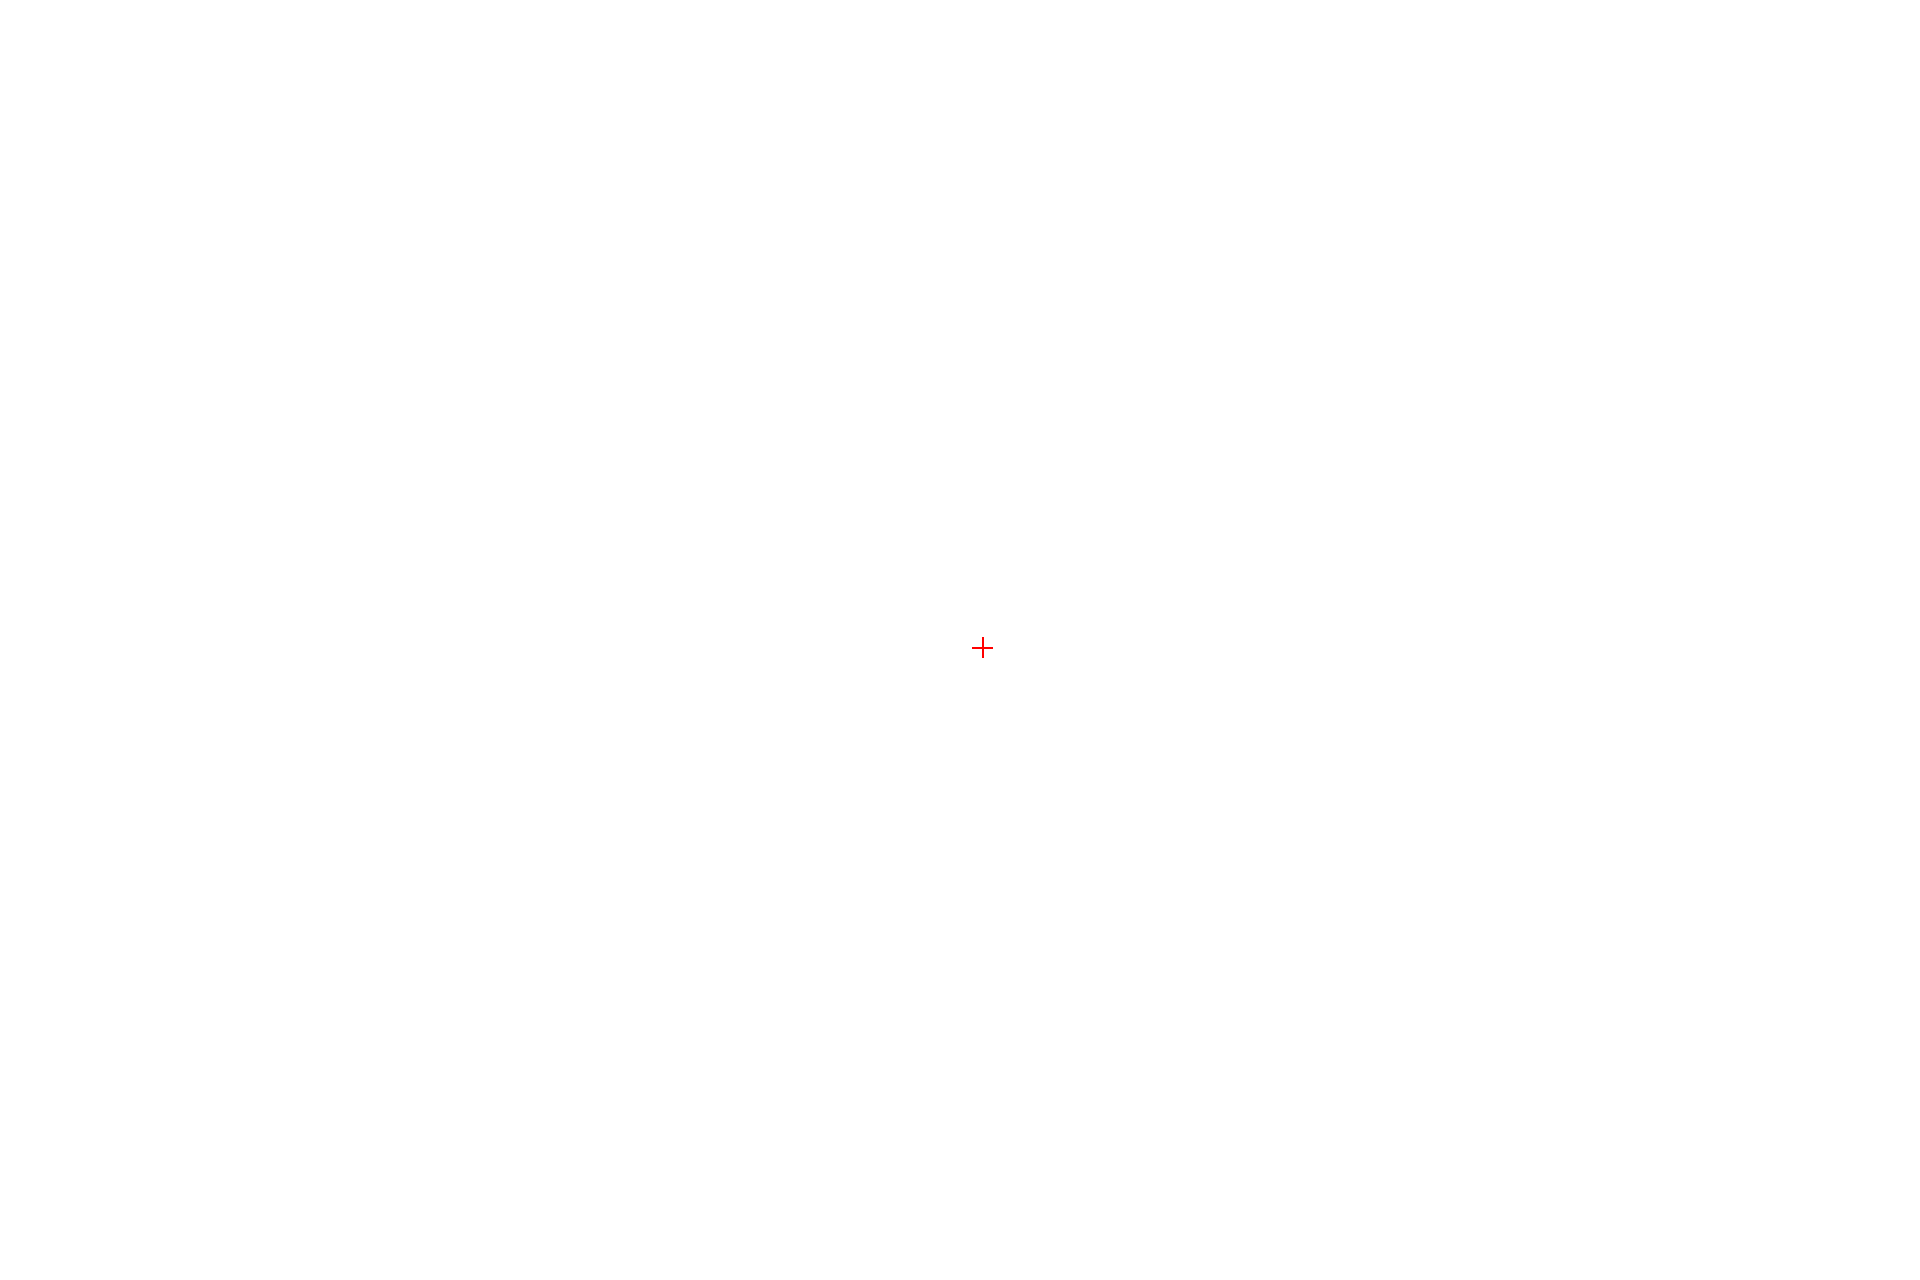

In [10]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Extract the calibration data for a specific camera
camera_name = 1.0
camera_name = int(camera_name)  # convert float to int
calibration_data = df.loc[df['key.camera_name'] == camera_name, [
    '[CameraCalibrationComponent].intrinsic.f_u',
    '[CameraCalibrationComponent].intrinsic.f_v',
    '[CameraCalibrationComponent].intrinsic.c_u',
    '[CameraCalibrationComponent].intrinsic.c_v',
    '[CameraCalibrationComponent].intrinsic.k1',
    '[CameraCalibrationComponent].intrinsic.k2',
    '[CameraCalibrationComponent].intrinsic.p1',
    '[CameraCalibrationComponent].intrinsic.p2',
    '[CameraCalibrationComponent].intrinsic.k3',
    '[CameraCalibrationComponent].width',
    '[CameraCalibrationComponent].height'
]].iloc[0]

# Extract the relevant calibration parameters
f_u = calibration_data['[CameraCalibrationComponent].intrinsic.f_u']
f_v = calibration_data['[CameraCalibrationComponent].intrinsic.f_v']
c_u = calibration_data['[CameraCalibrationComponent].intrinsic.c_u']
c_v = calibration_data['[CameraCalibrationComponent].intrinsic.c_v']
width = int(calibration_data['[CameraCalibrationComponent].width'])
height = int(calibration_data['[CameraCalibrationComponent].height'])


# Create an empty image to draw on
image = Image.new('RGB', (int(width), int(height)), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Draw a cross at the principal point
draw.line([(c_u - 10, c_v), (c_u + 10, c_v)], fill=(255, 0, 0), width=2)
draw.line([(c_u, c_v - 10), (c_u, c_v + 10)], fill=(255, 0, 0), width=2)

# Display the image with the rectangle drawn on it
image.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Extract the calibration data for a specific camera
camera_name = 1
calibration_data = df.loc[df['key.camera_name'] == camera_name, [
    '[CameraCalibrationComponent].intrinsic.f_u',
    '[CameraCalibrationComponent].intrinsic.f_v',
    '[CameraCalibrationComponent].intrinsic.c_u',
    '[CameraCalibrationComponent].intrinsic.c_v',
    '[CameraCalibrationComponent].intrinsic.k1',
    '[CameraCalibrationComponent].intrinsic.k2',
    '[CameraCalibrationComponent].intrinsic.p1',
    '[CameraCalibrationComponent].intrinsic.p2',
    '[CameraCalibrationComponent].intrinsic.k3',
    '[CameraCalibrationComponent].width',
    '[CameraCalibrationComponent].height'
]].iloc[0]

# Extract the relevant calibration parameters
f_u = calibration_data['[CameraCalibrationComponent].intrinsic.f_u']
f_v = calibration_data['[CameraCalibrationComponent].intrinsic.f_v']
c_u = calibration_data['[CameraCalibrationComponent].intrinsic.c_u']
c_v = calibration_data['[CameraCalibrationComponent].intrinsic.c_v']
width = int(calibration_data['[CameraCalibrationComponent].width']) # convert to int
height = int(calibration_data['[CameraCalibrationComponent].height']) # convert to int

# Create an empty image to draw on
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Draw a cross at the principal point
draw.line([(c_u - 10, c_v), (c_u + 10, c_v)], fill=(255, 0, 0), width=2)
draw.line([(c_u, c_v - 10), (c_u, c_v + 10)], fill=(255, 0, 0), width=2)

# Draw the radial distortion coefficients
k1 = calibration_data['[CameraCalibrationComponent].intrinsic.k1']
k2 = calibration_data['[CameraCalibrationComponent].intrinsic.k2']
k3 = calibration_data['[CameraCalibrationComponent].intrinsic.k3']

# Draw the tangential distortion coefficients
p1 = calibration_data['[CameraCalibrationComponent].intrinsic.p1']
p2 = calibration_data['[CameraCalibrationComponent].intrinsic.p2']

# Draw the text of the distortion coefficients on the image
draw.text((10, 10), f"k1: {k1}, k2: {k2}, k3: {k3}, p1: {p1}, p2: {p2}", fill=(0, 0, 0))

# Display the image with the distortion coefficients and the rectangle drawn on it
image.show()
plt.imshow(image)
plt.show()

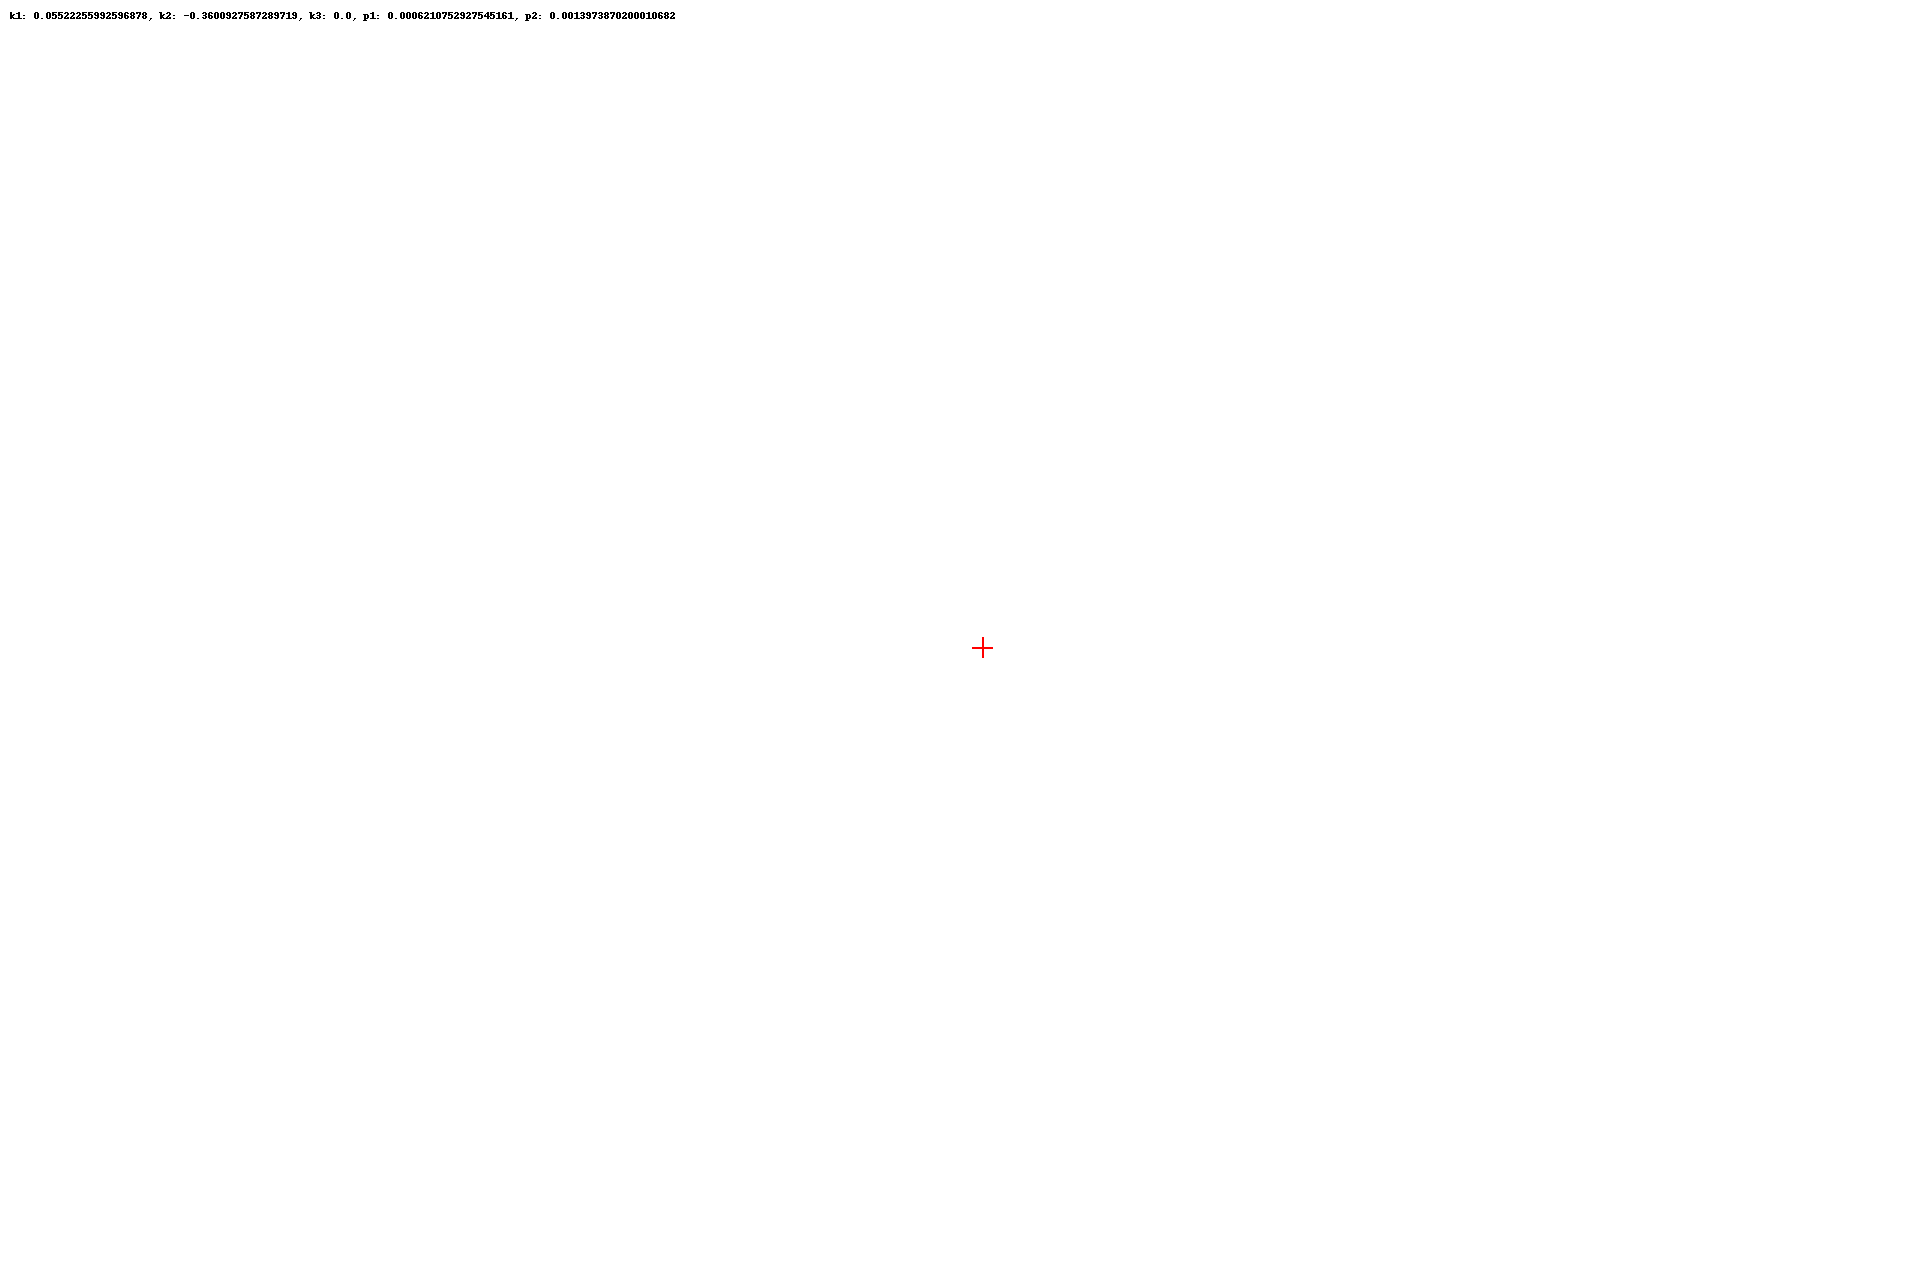

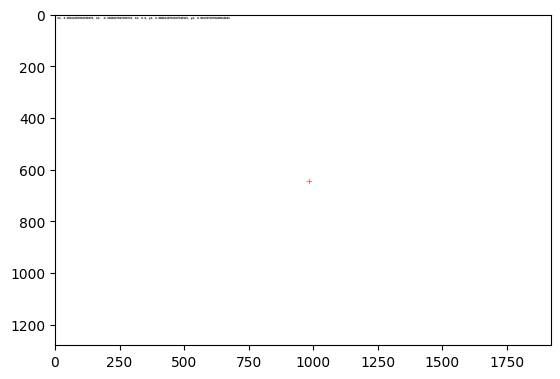

In [46]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Extract the calibration data for a specific camera
camera_name = 1
calibration_data = df.loc[df['key.camera_name'] == camera_name, [
    '[CameraCalibrationComponent].intrinsic.f_u',
    '[CameraCalibrationComponent].intrinsic.f_v',
    '[CameraCalibrationComponent].intrinsic.c_u',
    '[CameraCalibrationComponent].intrinsic.c_v',
    '[CameraCalibrationComponent].intrinsic.k1',
    '[CameraCalibrationComponent].intrinsic.k2',
    '[CameraCalibrationComponent].intrinsic.p1',
    '[CameraCalibrationComponent].intrinsic.p2',
    '[CameraCalibrationComponent].intrinsic.k3',
    '[CameraCalibrationComponent].width',
    '[CameraCalibrationComponent].height'
]].iloc[0]

# Extract the relevant calibration parameters
f_u = calibration_data['[CameraCalibrationComponent].intrinsic.f_u']
f_v = calibration_data['[CameraCalibrationComponent].intrinsic.f_v']
c_u = calibration_data['[CameraCalibrationComponent].intrinsic.c_u']
c_v = calibration_data['[CameraCalibrationComponent].intrinsic.c_v']
width = int(calibration_data['[CameraCalibrationComponent].width']) # convert to int
height = int(calibration_data['[CameraCalibrationComponent].height']) # convert to int

# Create an empty image to draw on
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Draw a cross at the principal point
draw.line([(c_u - 10, c_v), (c_u + 10, c_v)], fill=(255, 0, 0), width=2)
draw.line([(c_u, c_v - 10), (c_u, c_v + 10)], fill=(255, 0, 0), width=2)

# Draw the radial distortion coefficients
k1 = calibration_data['[CameraCalibrationComponent].intrinsic.k1']
k2 = calibration_data['[CameraCalibrationComponent].intrinsic.k2']
k3 = calibration_data['[CameraCalibrationComponent].intrinsic.k3']

# Draw the tangential distortion coefficients
p1 = calibration_data['[CameraCalibrationComponent].intrinsic.p1']
p2 = calibration_data['[CameraCalibrationComponent].intrinsic.p2']

# Draw the text of the distortion coefficients on the image
draw.text((10, 10), f"k1: {k1}, k2: {k2}, k3: {k3}, p1: {p1}, p2: {p2}", fill=(0, 0, 0))

# Display the image with the distortion coefficients and the rectangle drawn on it
image.show()
plt.imshow(image)
plt.show()

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

# Load the parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Extract the calibration data for a specific camera
camera_name = 1
calibration_data = df.loc[df['key.camera_name'] == camera_name, [
    '[CameraCalibrationComponent].intrinsic.f_u',
    '[CameraCalibrationComponent].intrinsic.f_v',
    '[CameraCalibrationComponent].intrinsic.c_u',
    '[CameraCalibrationComponent].intrinsic.c_v',
    '[CameraCalibrationComponent].intrinsic.k1',
    '[CameraCalibrationComponent].intrinsic.k2',
    '[CameraCalibrationComponent].intrinsic.p1',
    '[CameraCalibrationComponent].intrinsic.p2',
    '[CameraCalibrationComponent].intrinsic.k3',
    '[CameraCalibrationComponent].width',
    '[CameraCalibrationComponent].height'
]].iloc[0]

# Extract the relevant calibration parameters
f_u = calibration_data['[CameraCalibrationComponent].intrinsic.f_u']
f_v = calibration_data['[CameraCalibrationComponent].intrinsic.f_v']
c_u = calibration_data['[CameraCalibrationComponent].intrinsic.c_u']
c_v = calibration_data['[CameraCalibrationComponent].intrinsic.c_v']
width = int(calibration_data['[CameraCalibrationComponent].width']) # convert to int
height = int(calibration_data['[CameraCalibrationComponent].height']) # convert to int

# Load the parquet file into a PyArrow Table
table = pq.read_table('/content/drive/MyDrive/training/camera_image/file1.parquet')

# Extract the image data for a specific camera
camera_name = 1
image_data = table.filter(f'key.camera_name == {camera_name}')['image.data'][0].as_py()

# Convert the image data into an Image object
img = Image.fromarray(image_data)

# Create an empty image to draw on
img_draw = ImageDraw.Draw(img)

# Draw a cross at the principal point
img_draw.line([(c_u - 10, c_v), (c_u + 10, c_v)], fill=(255, 0, 0), width=2)
img_draw.line([(c_u, c_v - 10), (c_u, c_v + 10)], fill=(255, 0, 0), width=2)

# Draw the radial distortion coefficients
k1 = calibration_data['[CameraCalibrationComponent].intrinsic.k1']
k2 = calibration_data['[CameraCalibrationComponent].intrinsic.k2']
k3 = calibration_data['[CameraCalibrationComponent].intrinsic.k3']

# Draw the tangential distortion coefficients
p1 = calibration_data['[CameraCalibrationComponent].intrinsic.p1']
p2 = calibration_data['[CameraCalibrationComponent].intrinsic.p2']

# Draw the text of the distortion coefficients on the image
img_draw.text((10, 10), f"k1: {k1}, k2: {k2}, k3: {k3}, p1: {p1}, p2: {p2}", fill=(0, 0, 0))

# Display the image with the distortion coefficients and the rectangle drawn on it
plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
import pyarrow.parquet as pq
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the parquet file into a PyArrow Table
table = pq.read_table('/content/drive/MyDrive/training/camera_image/file1.parquet')


# Extract the calibration data for a specific camera
camera_name = 1
calibration_data = df.loc[df['key.camera_name'] == camera_name, [
    '[CameraCalibrationComponent].intrinsic.f_u',
    '[CameraCalibrationComponent].intrinsic.f_v',
    '[CameraCalibrationComponent].intrinsic.c_u',
    '[CameraCalibrationComponent].intrinsic.c_v',
    '[CameraCalibrationComponent].intrinsic.k1',
    '[CameraCalibrationComponent].intrinsic.k2',
    '[CameraCalibrationComponent].intrinsic.p1',
    '[CameraCalibrationComponent].intrinsic.p2',
    '[CameraCalibrationComponent].intrinsic.k3',
    '[CameraCalibrationComponent].width',
    '[CameraCalibrationComponent].height'
]].iloc[0]

# Extract the relevant calibration parameters
f_u = calibration_data['[CameraCalibrationComponent].intrinsic.f_u']
f_v = calibration_data['[CameraCalibrationComponent].intrinsic.f_v']
c_u = calibration_data['[CameraCalibrationComponent].intrinsic.c_u']
c_v = calibration_data['[CameraCalibrationComponent].intrinsic.c_v']
width = int(calibration_data['[CameraCalibrationComponent].width']) # convert to int
height = int(calibration_data['[CameraCalibrationComponent].height']) # convert to int


# Extract the image data
image_data = table.filter(f'key.camera_name == {camera_name}')['image.data'][0].as_py()

# Load the image from the data
img = Image.fromarray(image_data)

# Create an empty image to draw on
img_draw = ImageDraw.Draw(img)

# Draw a cross at the principal point
img_draw.line([(c_u - 10, c_v), (c_u + 10, c_v)], fill=(255, 0, 0), width=2)
img_draw.line([(c_u, c_v - 10), (c_u, c_v + 10)], fill=(255, 0, 0), width=2)

 #Draw the radial distortion coefficients
k1 = calibration_data['[CameraCalibrationComponent].intrinsic.k1']
k2 = calibration_data['[CameraCalibrationComponent].intrinsic.k2']
k3 = calibration_data['[CameraCalibrationComponent].intrinsic.k3']

# Draw the tangential distortion coefficients
p1 = calibration_data['[CameraCalibrationComponent].intrinsic.p1']
p2 = calibration_data['[CameraCalibrationComponent].intrinsic.p2']

# Draw the text of the distortion coefficients on the image
img_draw.text((10, 10), f"k1: {k1}, k2: {k2}, k3: {k3}, p1: {p1}, p2: {p2}", fill=(0, 0, 0))

# Display the image with the distortion coefficients and the rectangle drawn on it
img.show()
plt.imshow(img)
plt.show()

In [45]:
import pandas as pd
import numpy as np
import cv2

# Load the camera calibration parameters for a specific camera
calibration_file = '/content/drive/MyDrive/training/camera_calibration/file1.parquet'
camera_name = '5'
calibration_data = pd.read_parquet(calibration_file)

# Check if there is calibration data for the specified camera name
if not any(calibration_data['key.camera_name'] == camera_name):
    print(f"No calibration data found for camera {camera_name}")
else:
    # Extract the relevant calibration parameters
    camera_calibration = calibration_data[calibration_data['key.camera_name'] == camera_name].iloc[0]
    intrinsics = np.array(camera_calibration['value.intrinsic'])
    distortion_coeffs = np.array(camera_calibration['value.distortion'])
    extrinsics = np.array(camera_calibration['value.extrinsic'])

    # Load an image from the camera image folder
    image_file = '/content/drive/MyDrive/training/camera_image/file1.parquet'
    image_data = pd.read_parquet(image_file)
    image = np.array(image_data['data'][0])

    # Reshape the image to the correct dimensions
    height, width = image_data['height'][0], image_data['width'][0]
    image = image.reshape((height, width, 3)).astype(np.uint8)

    # Apply the calibration to the image
    undistorted_image = cv2.undistort(image, intrinsics, distortion_coeffs)
    projected_image, _ = cv2.projectPoints(image, extrinsics[:3], extrinsics[3:], intrinsics, distortion_coeffs)

    # Display the original and calibrated images side by side
    cv2.imshow('Original Image', image)
    cv2.imshow('Undistorted Image', undistorted_image)
    cv2.imshow('Projected Image', projected_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

No calibration data found for camera 5


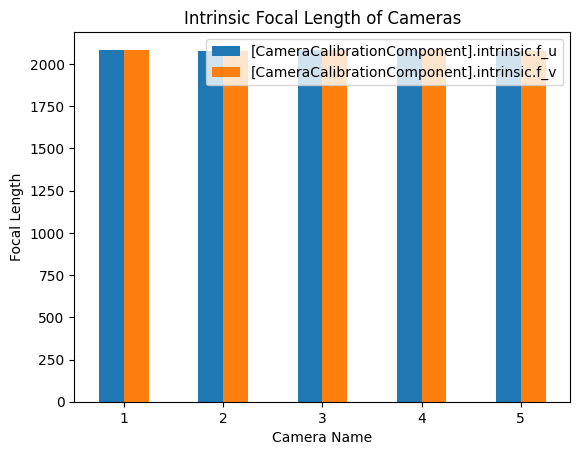

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .parquet file
data = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Group the data by camera name and get the mean of the selected columns
grouped_data = data.groupby('key.camera_name')[['[CameraCalibrationComponent].intrinsic.f_u', '[CameraCalibrationComponent].intrinsic.f_v']].mean()

# Plot the data as a bar chart
ax = grouped_data.plot(kind='bar', rot=0)

# Set the title and axis labels
ax.set_title('Intrinsic Focal Length of Cameras')
ax.set_xlabel('Camera Name')
ax.set_ylabel('Focal Length')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .parquet file
data = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')
# Group the data by camera name and get the mean of the selected columns
grouped_data = data.groupby('key.camera_name')[['[CameraCalibrationComponent].intrinsic.k1', '[CameraCalibrationComponent].intrinsic.k2', '[CameraCalibrationComponent].intrinsic.p1', '[CameraCalibrationComponent].intrinsic.p2']].mean()

# Plot the data as a horizontal bar chart
ax = grouped_data.plot(kind='barh')

# Set the title and axis labels
ax.set_title('Intrinsic Distortion Coefficients of Cameras')
ax.set_xlabel('Coefficients')
ax.set_ylabel('Camera Name')

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Read the data from the parquet file
data = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Select the columns containing the intrinsic calibration parameters
intrinsic_cols = ['[CameraCalibrationComponent].intrinsic.f_u',
                  '[CameraCalibrationComponent].intrinsic.f_v',
                  '[CameraCalibrationComponent].intrinsic.c_u',
                  '[CameraCalibrationComponent].intrinsic.c_v',
                  '[CameraCalibrationComponent].intrinsic.k1',
                  '[CameraCalibrationComponent].intrinsic.k2',
                  '[CameraCalibrationComponent].intrinsic.p1',
                  '[CameraCalibrationComponent].intrinsic.p2',
                  '[CameraCalibrationComponent].intrinsic.k3']

# Extract the intrinsic calibration parameters
intrinsic_params = data[intrinsic_cols].iloc[0]

# Print the intrinsic calibration parameters
print(intrinsic_params)

[CameraCalibrationComponent].intrinsic.f_u    2084.215657
[CameraCalibrationComponent].intrinsic.f_v    2084.215657
[CameraCalibrationComponent].intrinsic.c_u     982.699407
[CameraCalibrationComponent].intrinsic.c_v     647.342288
[CameraCalibrationComponent].intrinsic.k1        0.055223
[CameraCalibrationComponent].intrinsic.k2       -0.360093
[CameraCalibrationComponent].intrinsic.p1        0.000621
[CameraCalibrationComponent].intrinsic.p2        0.001397
[CameraCalibrationComponent].intrinsic.k3        0.000000
Name: 0, dtype: float64


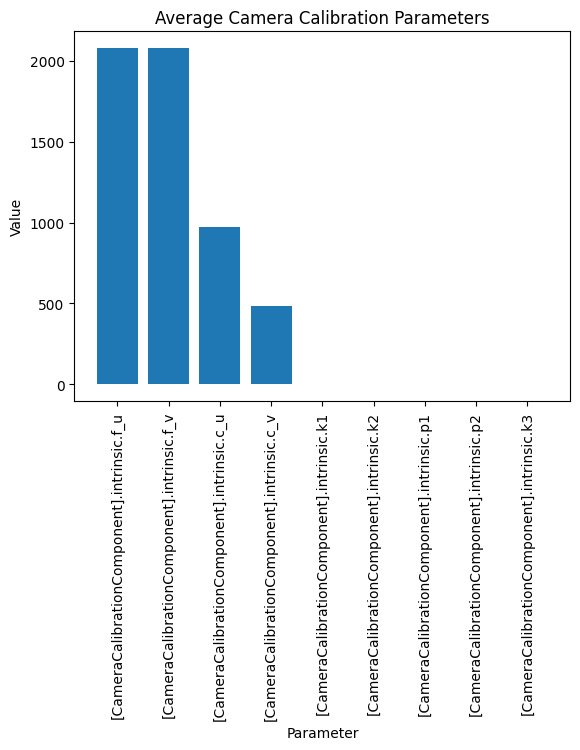

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .parquet file
data = pd.read_parquet('/content/drive/MyDrive/training/camera_calibration/file1.parquet')

# Select the columns to visualize
columns_to_visualize = ['[CameraCalibrationComponent].intrinsic.f_u', 
                        '[CameraCalibrationComponent].intrinsic.f_v',
                        '[CameraCalibrationComponent].intrinsic.c_u',
                        '[CameraCalibrationComponent].intrinsic.c_v',
                        '[CameraCalibrationComponent].intrinsic.k1',
                        '[CameraCalibrationComponent].intrinsic.k2',
                        '[CameraCalibrationComponent].intrinsic.p1',
                        '[CameraCalibrationComponent].intrinsic.p2',
                        '[CameraCalibrationComponent].intrinsic.k3']

# Get the mean of the selected columns
grouped_data = data[columns_to_visualize].mean()

# Create a bar plot of the grouped data
plt.bar(columns_to_visualize, grouped_data)

# Set the title and axis labels
plt.title('Average Camera Calibration Parameters')
plt.xlabel('Parameter')
plt.ylabel('Value')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [15]:
import math

# Horizontal field of view
f_u = df.loc[0, '[CameraCalibrationComponent].intrinsic.f_u']
fov_u = 2 * math.atan(df.loc[0, '[CameraCalibrationComponent].width'] / (2 * f_u))
print('Horizontal FOV: {:.2f} degrees'.format(math.degrees(fov_u)))

# Vertical field of view
f_v = df.loc[0, '[CameraCalibrationComponent].intrinsic.f_v']
fov_v = 2 * math.atan(df.loc[0, '[CameraCalibrationComponent].height'] / (2 * f_v))
print('Vertical FOV: {:.2f} degrees'.format(math.degrees(fov_v)))

Horizontal FOV: 49.46 degrees
Vertical FOV: 34.14 degrees
